In [1]:
import sys
print(sys.version)


3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [5]:
!pip install "C:\Aorda\PSG\Python\psgpython-3.11-cp311-cp311-win_amd64.whl"

Processing c:\aorda\psg\python\psgpython-3.11-cp311-cp311-win_amd64.whl


In [59]:
import pandas as pd
import numpy as np
import psgpython

matrix_budget_path = r"C:\Users\ASUS\Desktop\data_problem_min_cvar_dev_2p9_short\matrix_budget.txt"
matrix_returns_path = r"C:\Users\ASUS\Desktop\data_problem_min_cvar_dev_2p9_short\matrix_returns.txt"
matrix_scenarios_path = r"C:\Users\ASUS\Desktop\data_problem_min_cvar_dev_2p9_short\matrix_scenarios.txt"

matrix_budget_df = pd.read_csv(matrix_budget_path, sep="\t", header=0, dtype=float)
matrix_returns_df = pd.read_csv(matrix_returns_path, sep="\t", header=0, dtype=float)

matrix_scenarios_df = pd.read_csv(matrix_scenarios_path, sep="\s+", header=0, dtype=float)

header_scenarios = matrix_scenarios_df.columns.tolist()
header_budget = matrix_budget_df.columns.tolist()
header_returns = matrix_returns_df.columns.tolist()

matrix_budget_np = matrix_budget_df.to_numpy()
matrix_returns_np = matrix_returns_df.to_numpy()
matrix_scenarios_np = matrix_scenarios_df.to_numpy()

# 打印检查数据格式
print("Header:", header_scenarios)
print("matrix_budget_np shape:", matrix_budget_np.shape)
print("matrix_returns_np shape:", matrix_returns_np.shape)
print("matrix_scenarios_np shape:", matrix_scenarios_np.shape)


Header: ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10']
matrix_budget_np shape: (1, 10)
matrix_returns_np shape: (1, 10)
matrix_scenarios_np shape: (1000, 10)


In [139]:
allowExternal = True
suppressMessages = False

# 任务名称
problem_name = "problem_test"

# PSG 优化问题描述
problem_statement = """minimize
  cvar_dev(0.90, matrix_scenarios_body)
Constraint: == 1
  linear(matrix_budget_body)
Constraint: >= 0.029
  linear(matrix_returns_body)
Box: >= 0
Value:
   avg(matrix_scenarios_body)
   var_risk(0.99, matrix_scenarios_body)
   cvar_risk(0.99, matrix_scenarios_body)
   cvar_dev(0.90, matrix_scenarios_body)
   max_risk(matrix_scenarios_body)
   pr_pen(2.268479339670E-03, matrix_scenarios_body)
   st_dev(matrix_scenarios_body)
   variance(matrix_scenarios_body)"""

# **PSG 需要数据格式为 [header, matrix]**
problem_dictionary = {
    'problem_name': problem_name,
    'problem_statement': problem_statement,
    'matrix_scenarios_body': [header_scenarios, matrix_scenarios_np],  # 关键格式
    'matrix_budget_body': [header_budget, matrix_budget_np],
    'matrix_returns_body': [header_returns, matrix_returns_np]
}

# 运行 PSG 求解器
res = psgpython.psg_solver(problem_dictionary, allowExternal, suppressMessages)

# 打印优化结果
print(res)

Running solver
Reading problem formulation
Asking for data information
Getting data
     10.0% of scenarios is processed
100% of matrix_scenarios_body was read
100% of matrix_budget_body was read
100% of matrix_returns_body was read
Start optimization
Ext.iteration=0  Objective=0.000000000000E+00  Residual=0.000000000000E+00
Ext.iteration=5  Objective=0.139056265442E+00  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.139056265442 [0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.27, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.139056265442 [0.00000000000]
Constraint: constraint_1 =  1.000000000000E+00 [ 1.110223024625E-16]
Constraint: constraint_2 =  2.900000000000E-02 [ 1.734723475977E-17]
Function: linear(matrix_budget_body) = 

In [127]:
allowExternal = True
suppressMessages = False

problem_name = "problem_test"

problem_statement = """minimize
  cvar_dev(0.90, matrix_scenarios_body)
Constraint: == 1
  linear(matrix_budget_body)
Constraint: >= 0.02
  linear(matrix_returns_body)
Box: >= 0
Value:
   avg(matrix_scenarios_body)
   var_risk(0.99, matrix_scenarios_body)
   cvar_risk(0.99, matrix_scenarios_body)
   cvar_dev(0.90, matrix_scenarios_body)
   max_risk(matrix_scenarios_body)
   pr_pen(2.268479339670E-03, matrix_scenarios_body)
   st_dev(matrix_scenarios_body)
   variance(matrix_scenarios_body)"""

problem_dictionary = {
    'problem_name': problem_name,
    'problem_statement': problem_statement,
    'matrix_scenarios_body': [header_scenarios, matrix_scenarios_np],  # 关键格式
    'matrix_budget_body': [header_budget, matrix_budget_np],
    'matrix_returns_body': [header_returns, matrix_returns_np]
}

res = psgpython.psg_solver(problem_dictionary, allowExternal, suppressMessages)

print(res)

Running solver
Reading problem formulation
Asking for data information
Getting data
     10.0% of scenarios is processed
100% of matrix_scenarios_body was read
100% of matrix_budget_body was read
100% of matrix_returns_body was read
Start optimization
Ext.iteration=0  Objective=0.000000000000E+00  Residual=0.000000000000E+00
Ext.iteration=6  Objective=0.134180799027E+00  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.134180799027 [5.551115123126E-17]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.25, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.134180799027 [5.551115123126E-17]
Constraint: constraint_1 =  1.000000000000E+00 [-4.440892098501E-16]
Constraint: constraint_2 =  2.000000000000E-02 [-3.469446951954E-18]
Function: linear(matrix_budge

In [87]:
print(res_4.keys())  # 查看返回字典的键
print(res_4)  # 打印整个返回结果，看看数据是怎么存储的


dict_keys(['problem_name', 'solution_status', 'problem_statement', 'output', 'point_constraints_problem_1', 'point_slack_constraints_problem_1', 'point_dual_constraints_problem_1', 'point_problem_1', 'log'])
{'problem_name': 'problem_1', 'solution_status': 'optimal', 'problem_statement': ['    minimize', '      cvar_dev(0.90, matrix_scenarios_body)', '    Constraint: == 1', '      linear(matrix_budget_body)', '    Constraint: >= 0.02', '      linear(matrix_returns_body)', '    Box: >= 0', '    Value:', '       avg(matrix_scenarios_body)', '       var_risk(0.99, matrix_scenarios_body)', '       cvar_risk(0.99, matrix_scenarios_body)', '       cvar_dev(0.90, matrix_scenarios_body)', '       max_risk(matrix_scenarios_body)', '       pr_pen(2.268479339670E-03, matrix_scenarios_body)', '       st_dev(matrix_scenarios_body)', '       variance(matrix_scenarios_body)'], 'output': ['Problem: problem_1, solution_status = optimal', 'Timing: data_loading_time = 0.27, preprocessing_time = 0.01, sol

In [145]:
import pandas as pd
import numpy as np
import psgpython
import matplotlib.pyplot as plt

matrix_budget_path = r"C:\Users\ASUS\Desktop\data_problem_min_cvar_dev_2p9_short\matrix_budget.txt"
matrix_returns_path = r"C:\Users\ASUS\Desktop\data_problem_min_cvar_dev_2p9_short\matrix_returns.txt"
matrix_scenarios_path = r"C:\Users\ASUS\Desktop\data_problem_min_cvar_dev_2p9_short\matrix_scenarios.txt"

matrix_budget_df = pd.read_csv(matrix_budget_path, sep="\t", header=0, dtype=float)
matrix_returns_df = pd.read_csv(matrix_returns_path, sep="\t", header=0, dtype=float)
matrix_scenarios_df = pd.read_csv(matrix_scenarios_path, sep="\s+", header=0, dtype=float)

header_scenarios = matrix_scenarios_df.columns.tolist()
header_budget = matrix_budget_df.columns.tolist()
header_returns = matrix_returns_df.columns.tolist()

matrix_budget_np = matrix_budget_df.to_numpy()
matrix_returns_np = matrix_returns_df.to_numpy()
matrix_scenarios_np = matrix_scenarios_df.to_numpy()

alpha = 0.90
allowExternal = True
suppressMessages = False
problem_name = "problem_test"

expected_returns = np.linspace(0.0005, 0.037, 20) 
cvar_values = []

for target_return in expected_returns:
    problem_statement = f"""minimize
      cvar_dev(0.90, matrix_scenarios_body)
    Constraint: == 1
      linear(matrix_budget_body)
    Constraint: >= {target_return:.6f}
      linear(matrix_returns_body)
    Box: >= 0
    Value:
       cvar_risk(0.90, matrix_scenarios_body)"""
    
    problem_dictionary = {
        'problem_name': problem_name,
        'problem_statement': problem_statement,
        'matrix_scenarios_body': [header_scenarios, matrix_scenarios_np],
        'matrix_budget_body': [header_budget, matrix_budget_np],
        'matrix_returns_body': [header_returns, matrix_returns_np]
    }
    
    res = psgpython.psg_solver(problem_dictionary, allowExternal, suppressMessages)
    if res and 'cvar_risk(0.90, matrix_scenarios_body)' in res:
        cvar_values.append(res['cvar_risk(0.99, matrix_scenarios_body)'])
    else:
        cvar_values.append(np.nan) 


results_df = pd.DataFrame({'Expected Return': expected_returns, 'CVaR': cvar_values})
results_df.to_csv("efficient_frontier_results.csv", index=False)

Running solver
Reading problem formulation
Asking for data information
Getting data
     10.0% of scenarios is processed
100% of matrix_scenarios_body was read
100% of matrix_budget_body was read
100% of matrix_returns_body was read
Start optimization
Ext.iteration=0  Objective=0.000000000000E+00  Residual=0.000000000000E+00
Ext.iteration=10  Objective=0.130804701127E+00  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.130804701127 [-5.551115123126E-17]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.27, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.130804701127 [-5.551115123126E-17]
Constraint: constraint_1 =  1.000000000000E+00 [ 3.330669073875E-16]
Constraint: constraint_2 =  5.000000000000E-04 [-1.604619215279E-17]
Function: cvar_dev(0.9,mat

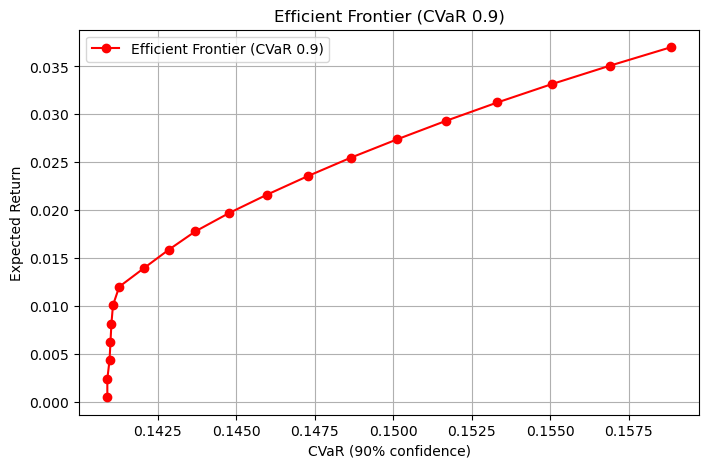

In [147]:
import matplotlib.pyplot as plt
expected_returns_09 = [0.0005, 0.002421, 0.004342, 0.006263, 0.008184, 0.010105, 0.012026, 0.013947,
                       0.015868, 0.017789, 0.019711, 0.021632, 0.023553, 0.025474, 0.027395, 0.029316,
                       0.031237, 0.033158, 0.035079, 0.037000]

cvar_values_09 = [0.1409, 0.1409, 0.14097, 0.1410, 0.14103, 0.14108, 0.14128, 0.14206,
                  0.14285, 0.14370, 0.14478, 0.14599, 0.14728, 0.14865, 0.15013, 0.15168,
                  0.15332, 0.15506, 0.15691, 0.15885]

plt.figure(figsize=(8, 5))
plt.plot(cvar_values_09, expected_returns_09, marker='o', linestyle='-', color='r', label="Efficient Frontier (CVaR 0.9)")
plt.xlabel('CVaR (90% confidence)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (CVaR 0.9)')
plt.grid(True)
plt.legend()
plt.show()


In [155]:
allowExternal = True
suppressMessages = False

problem_name = "problem_test"

specified_cvar_value = 0.15  

problem_statement = f"""maximize
  linear(matrix_returns_body)
Constraint: <= {specified_cvar_value:.6f}
  cvar_dev(0.90, matrix_scenarios_body)
Constraint: == 1
  linear(matrix_budget_body)
Box: >= 0
Value:
   avg(matrix_scenarios_body)
   var_risk(0.99, matrix_scenarios_body)
   cvar_risk(0.99, matrix_scenarios_body)
   cvar_dev(0.90, matrix_scenarios_body)
   max_risk(matrix_scenarios_body)
   pr_pen(2.268479339670E-03, matrix_scenarios_body)
   st_dev(matrix_scenarios_body)
   variance(matrix_scenarios_body)"""

problem_dictionary = {
    'problem_name': problem_name,
    'problem_statement': problem_statement,
    'matrix_scenarios_body': [header_scenarios, matrix_scenarios_np],
    'matrix_budget_body': [header_budget, matrix_budget_np],
    'matrix_returns_body': [header_returns, matrix_returns_np]
}


res = psgpython.psg_solver(problem_dictionary, allowExternal, suppressMessages)

print(res)


Running solver
Reading problem formulation
Asking for data information
Getting data
     10.0% of scenarios is processed
100% of matrix_returns_body was read
100% of matrix_scenarios_body was read
100% of matrix_budget_body was read
Start optimization
Ext.iteration=0  Objective=-.000000000000E+00  Residual=-.960000000000E+01
Ext.iteration=4  Objective=0.371938820000E-01  Residual=-.361355885952E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 3.719388200000E-02 [-0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.27, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 3.719388200000E-02 [-0.00000000000]
Constraint: constraint_1 =  1.443538142820E-01 [-5.646185718000E-03]
Constraint: constraint_2 =  1.000000000000E+00 [-2.220446049250E-16]
Function: linear(matrix_retur

In [163]:
import numpy as np

alpha = 0.90
allowExternal = True
suppressMessages = False
problem_name = "problem_test"

expected_returns = np.array([0.0005, 0.002421, 0.004342, 0.006263, 0.008184, 0.010105, 0.012026, 0.013947,
                             0.015868, 0.017789, 0.019711, 0.021632, 0.023553, 0.025474, 0.027395, 0.029316,
                             0.031237, 0.033158, 0.035079, 0.037000])
cvar_values = []

for target_return in expected_returns:
    problem_statement = f"""maximize
      linear(matrix_returns_body)
    Constraint: <= {target_return:.6f}
      cvar_dev({alpha}, matrix_scenarios_body)
    Constraint: == 1
      linear(matrix_budget_body)
    Box: >= 0
    Value:
       cvar_risk({alpha}, matrix_scenarios_body)"""
    
    problem_dictionary = {
        'problem_name': problem_name,
        'problem_statement': problem_statement,
        'matrix_scenarios_body': [header_scenarios, matrix_scenarios_np],
        'matrix_budget_body': [header_budget, matrix_budget_np],
        'matrix_returns_body': [header_returns, matrix_returns_np]
    }
    
    res = psgpython.psg_solver(problem_dictionary, allowExternal, suppressMessages)
    if res and f'cvar_risk({alpha}, matrix_scenarios_body)' in res:
        cvar_values.append(res[f'cvar_risk({alpha}, matrix_scenarios_body)'])
    else:
        cvar_values.append(np.nan)


Running solver
Reading problem formulation
Asking for data information
Getting data
     10.0% of scenarios is processed
100% of matrix_returns_body was read
100% of matrix_scenarios_body was read
100% of matrix_budget_body was read
Start optimization
Ext.iteration=0  Objective=-.000000000000E+00  Residual=-.320000000000E-01
Ext.iteration=97  Objective=-.308593408069E-01  Residual=0.832766646692E+01
Optimization is stopped. Constraints are inconsistent
Solution is infeasible
Calculating resulting outputs. Writing solution.
Objective: objective = -3.085934080692E-02 [-4.163336342344E-17]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = infeasible
Timing: data_loading_time = 0.26, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = -3.085934080692E-02 [-4.163336342344E-17]
Constraint: constraint_1 =  1.306197885456E-01 [ 1.301197885456E-01]
Constraint: constraint_2 =  1.000000000000E+00 [-

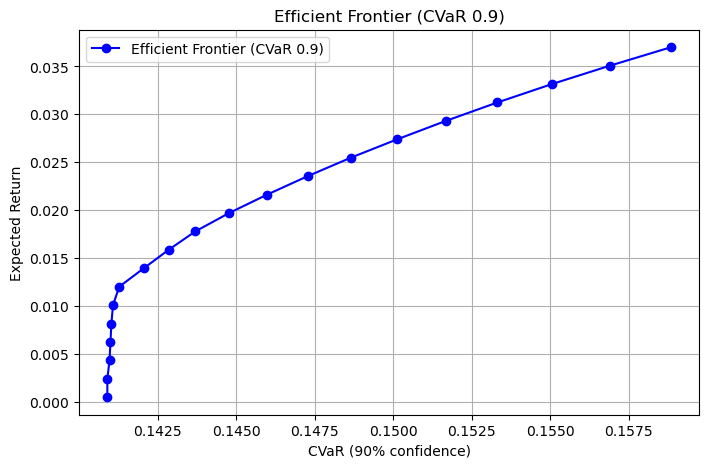

In [173]:
import matplotlib.pyplot as plt
expected_returns_09 = [0.0005, 0.002421, 0.004342, 0.006263, 0.008184, 0.010105, 0.012026, 0.013947,
                       0.015868, 0.017789, 0.019711, 0.021632, 0.023553, 0.025474, 0.027395, 0.029316,
                       0.031237, 0.033158, 0.035079, 0.037000]

cvar_values_09 = [0.1409, 0.1409, 0.14097, 0.1410, 0.14103, 0.14108, 0.14128, 0.14206,
                  0.14285, 0.14370, 0.14478, 0.14599, 0.14728, 0.14865, 0.15013, 0.15168,
                  0.15332, 0.15506, 0.15691, 0.15885]

# 绘制有效前沿 (CVaR 0.9)
plt.figure(figsize=(8, 5))
plt.plot(cvar_values_09, expected_returns_09, marker='o', linestyle='-', color='b', label="Efficient Frontier (CVaR 0.9)")
plt.xlabel('CVaR (90% confidence)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (CVaR 0.9)')
plt.grid(True)
plt.legend()
plt.show()
